In [67]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

In [1]:
import numpy as np
import pandas as pd
import scipy

In [2]:
# read data
file_location = "/Users/mingchang/Downloads/"
file_name = "BA501_python_data.csv"
my_data = pd.read_csv(file_location + file_name)

my_data.head(5)

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,JP,20170402,12624548,5813140433216629693,16.138855,5006730028073359543,ANDROID_APPS
1,US,20170403,12624549,16333056276711034931,9.990000,5938685669571545259,ANDROID_APPS
2,JP,20170404,12624548,11227119161741298366,19.887087,17623708458399141713,ANDROID_APPS
3,US,20170403,12624548,11927299833124210932,19.990000,18042812344456618148,ANDROID_APPS
4,JP,20170403,12624549,11644727017708872749,88.220093,4325104700699531031,ANDROID_APPS


In [ ]:
###### visualization

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
###### create figure and axes

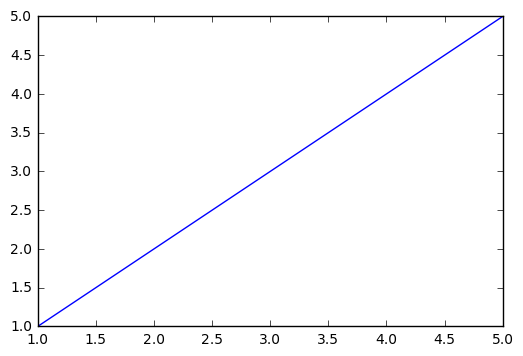

In [5]:
x = np.array([1,2,3,4,5])
y = np.array([1,2,3,4,5])
fig, ax = plt.subplots()
# create a simple line plot
ax.plot(x, y)

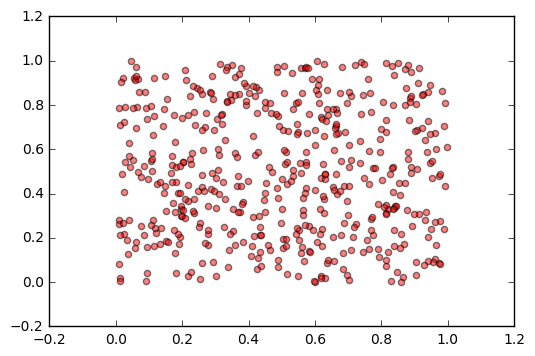

In [6]:
# scatterplot
N = 500
x = np.random.rand(N)
y = np.random.rand(N)

fig, ax = plt.subplots()
ax.scatter(x, y, alpha=0.5, c="red")

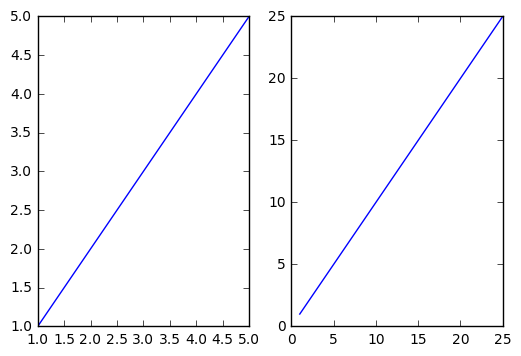

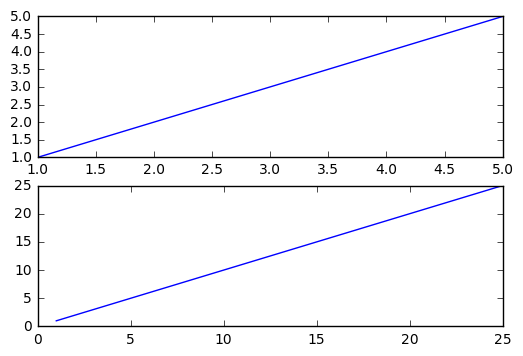

In [7]:
# create two plots
x = np.array([1,2,3,4,5])
y = np.array([1,2,3,4,5])
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].plot(x, y)
axes[1].plot(x*x, y*y)
# vertically
fig, axes = plt.subplots(nrows=2, ncols=1)
axes[0].plot(x, y)
axes[1].plot(x*x, y*y)

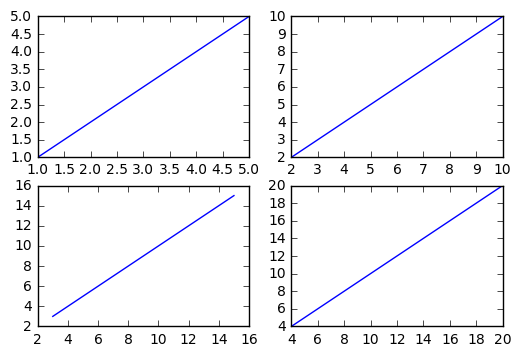

In [8]:
# 2x2 plot
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0,0].plot(x,y)
axes[0,1].plot(x*2,y*2)
axes[1,0].plot(x*3,y*3)
axes[1,1].plot(x*4,y*4)

In [ ]:
###### histogram

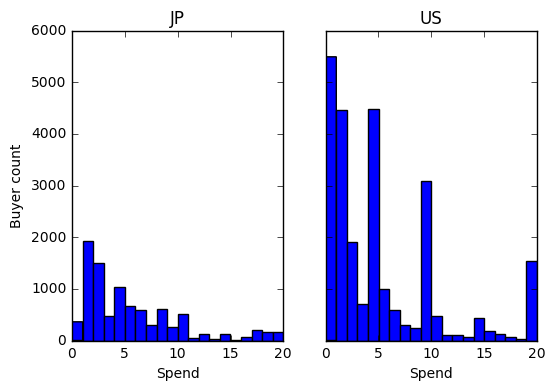

In [27]:
# distribution
#my_series = my_data[["spend_usd","country"]][(my_data.spend_usd < 20) & (my_data.country.isin(["US","JP","FR","UK"]))]
my_series_jp = my_data["spend_usd"][(my_data.spend_usd < 20) & (my_data.country == "JP")]
my_series_us = my_data["spend_usd"][(my_data.spend_usd < 20) & (my_data.country == "US")]

# play with it first
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)
ax[0].hist(my_series_jp, bins=20)
ax[1].hist(my_series_us, bins=20)

ax[0].set_title("JP")
ax[1].set_title("US")
ax[0].set_ylabel("Buyer count")
ax[0].set_xlabel("Spend")
ax[1].set_xlabel("Spend")

(array([  1.60000000e+01,   7.00000000e+01,   5.90600000e+03,
          8.98000000e+02,   3.06000000e+03,   3.38000000e+02,
          6.40000000e+01,   1.57800000e+03,   7.10000000e+01,
          5.62000000e+02,   5.00000000e+01,   3.80000000e+01,
          4.41400000e+03,   4.67000000e+02,   5.12000000e+02,
          4.70000000e+01,   6.10000000e+01,   4.94000000e+02,
          6.50000000e+01,   2.21000000e+02,   7.00000000e+00,
          5.00000000e+01,   1.89000000e+02,   7.90000000e+01,
          3.00300000e+03,   7.00000000e+01,   2.86000000e+02,
          1.23000000e+02,   2.30000000e+01,   7.70000000e+01,
          7.00000000e+00,   1.00000000e+01,   9.00000000e+01,
          1.40000000e+01,   4.30000000e+01,   3.00000000e+00,
          7.00000000e+00,   4.37000000e+02,   9.00000000e+00,
          1.60000000e+02,   8.20000000e+01,   1.30000000e+01,
          3.70000000e+01,   1.10000000e+01,   5.40000000e+01,
          1.10000000e+01,   1.00000000e+00,   1.40000000e+01,
        

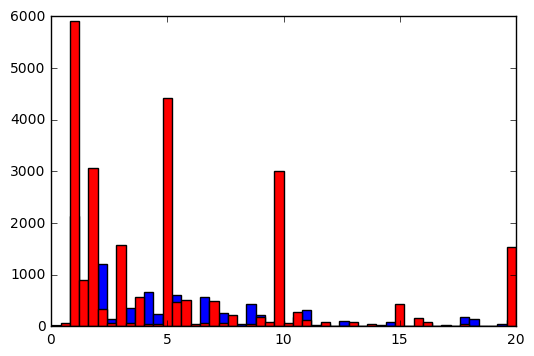

In [10]:
# two histogram on the same chart
my_series_jp = my_data["spend_usd"][(my_data.spend_usd < 20) & (my_data.country == "JP")]
my_series_us = my_data["spend_usd"][(my_data.spend_usd < 20) & (my_data.country == "US")]

# play with it first
fig, ax = plt.subplots()
ax.hist(my_series_jp, bins=50, color='blue')
ax.hist(my_series_us, bins=50, color='red')


In [ ]:
###### time series

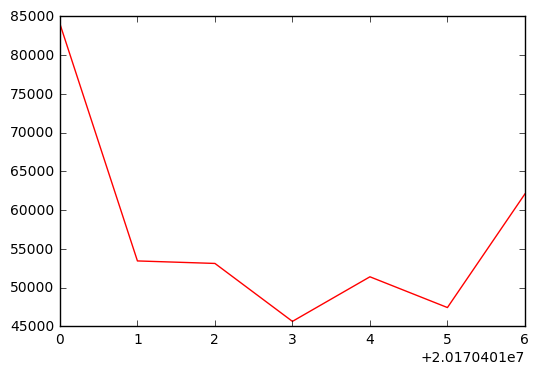

In [12]:
import datetime
# goal: compare revenue performance between red and blue
np.unique(my_data["experiment_id"])
red_button = np.unique(my_data["experiment_id"])[0]
blue_button = np.unique(my_data["experiment_id"])[1]
#red_button=12624548
#blue_button=12624549

# subset the data
red_button_data = my_data[['date','spend_usd']][my_data.experiment_id == red_button]

# since we want to show total spend per day, we group by date. 
#now we have a series, with index = time, how nice
my_ts = red_button_data.groupby('date')['spend_usd'].sum()
#my_ts # this is a series, works better this way

fig, ax = plt.subplots()
#ax.plot(my_ts)
ax.plot(my_ts, c= "red")

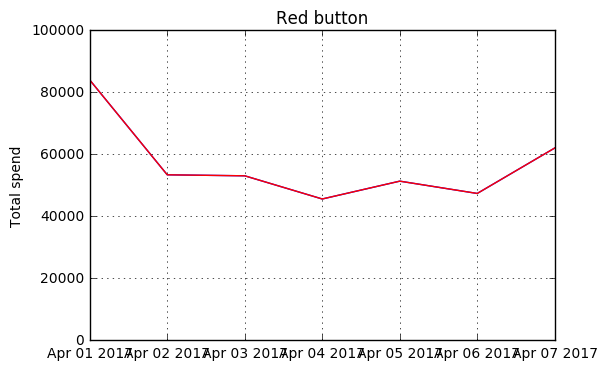

In [13]:
# x axis is messed up
my_data.date = pd.to_datetime(my_data.date, format='%Y%m%d')
# redo it
red_button_data = my_data[['date','spend_usd']][my_data.experiment_id == red_button]
my_ts = red_button_data.groupby('date')['spend_usd'].sum()

fig, ax = plt.subplots()
ax.plot(my_ts)
ax.plot(my_ts, c= "red")

# some tweaks
ax.set_ylim(0,100000)
ax.set_title("Red button")
ax.set_ylabel("Total spend")
ax.set_xlabel("")
#ax.grid(True, which="major")
ax.grid(True, which="both")

# format dollar sign - a little tricky

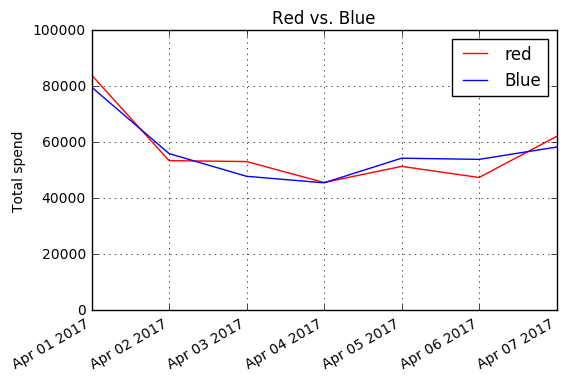

In [14]:
# now plot both red and blue
red_button = np.unique(my_data["experiment_id"])[0]
blue_button = np.unique(my_data["experiment_id"])[1]

# subset the data
red_button_data = my_data[['date','spend_usd']][my_data.experiment_id == red_button]
blue_button_data = my_data[['date','spend_usd']][my_data.experiment_id == blue_button]

red_ts = red_button_data.groupby('date')['spend_usd'].sum()
blue_ts = blue_button_data.groupby('date')['spend_usd'].sum()

fig, ax = plt.subplots()
ax.plot(red_ts, color="red", label="red")
ax.plot(blue_ts, color="blue", label = "blue")

# some tweaks
ax.set_ylim(0,100000)
ax.set_title("Red vs. Blue")
ax.set_ylabel("Total spend")
ax.grid(True, which="both")
# change legend
ax.legend().get_texts()[0].set_text("Red")
ax.legend().get_texts()[1].set_text("Blue")
# format date
plt.gcf().autofmt_xdate()

In [ ]:
# homework: cumulative time series

In [ ]:
###### scipy

In [ ]:
###### functions